In [ ]:
#Problem statement
#Develop a sentiment analysis model to classify restarunt reviews as positve or negative

In [ ]:
#Description
# with the rapid growth of online platforms for sharing opinions and reviews,restarunts often rely
#on the customer feedback to imporve their services and attract   a new customers.
# Analyzing the sentiment of these reviews can provide valuable insights into customer satisfaction.

In [ ]:
pip install pandas

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sentiment analysis/Reviews.csv')

# New section

In [4]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
data.head() # Top 5 rows of the data set

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.tail() # Last 5 rows of the data set

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
data.info() # information of the dat set like , data type , memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
data.describe() # stastical information of the data set

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
#checking the null values of the data set
data.isnull().sum()

,0
Review,0
Liked,0


In [10]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [11]:
#checking the value counts
value_counts = data['Liked'].value_counts()
print(value_counts)

Liked
1    500
0    500
Name: count, dtype: int64


In [12]:
pip install matplotlib

In [ ]:
pip install seaborn

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#df['cleaned_text'] = df['text_column'].apply(advanced_preprocessing)


KeyError: 'text_column'

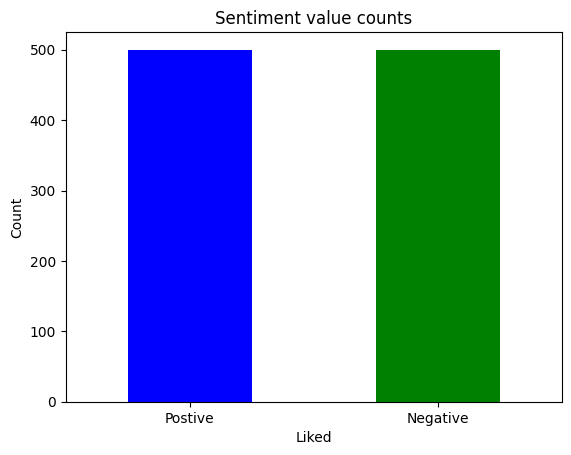

In [17]:
value_counts.plot(kind = 'bar' , color = ['blue', 'green'])
plt.title("Sentiment value counts")
plt.xlabel('Liked')
plt.ylabel('Count')
plt.xticks(ticks=[0,1] , labels=['Postive','Negative'],rotation=0)
plt.show()

In [ ]:
pip install wordcloud

In [18]:
from wordcloud import WordCloud

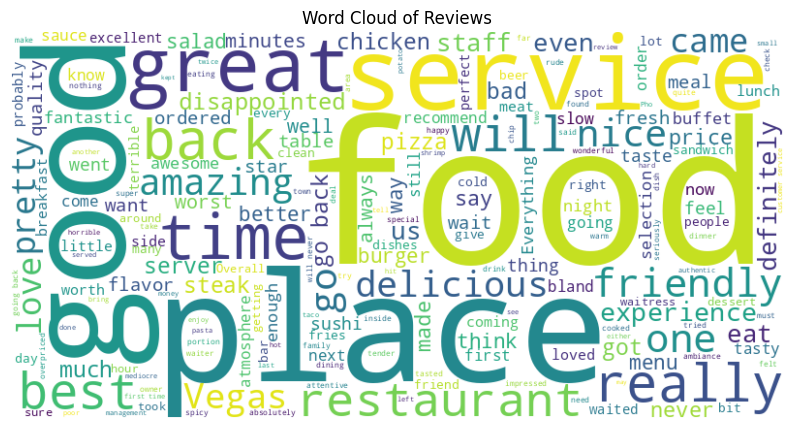

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


# Combine the text from the 'Review' column
combined_text = " ".join(data['Review'])

# Create the word cloud without specifying a font path
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


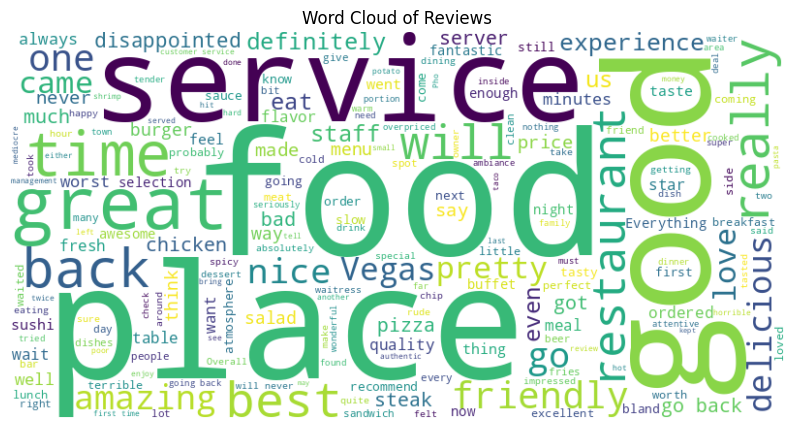

In [20]:
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width = 800 , height = 400 ,background_color = 'white').generate(combined_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [21]:
from collections import Counter

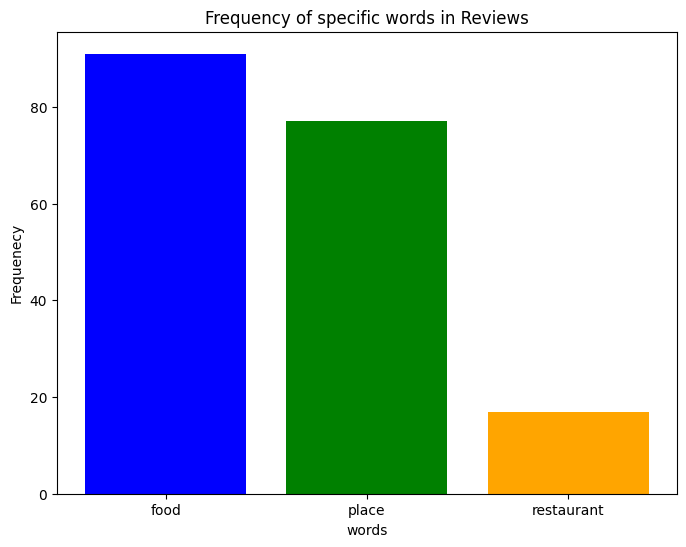

In [22]:
target_words = ['food','place','restaurant']
all_words = " ".join(data['Review']).lower().split()
word_counts = Counter(all_words)
target_word_counts = {word:word_counts[word] for word in target_words}
plt.figure(figsize=(8,6))
plt.bar(target_word_counts.keys(),target_word_counts.values() , color = ['blue','green','orange'])
plt.xlabel('words')
plt.ylabel('Frequenecy')
plt.title('Frequency of specific words in Reviews')
plt.show()

In [23]:
#Text preprocessing

In [24]:
#convert a data set into lower case
lowercased_text = data['Review'].str.lower()

In [25]:
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [26]:
#tokinization
from nltk.tokenize import word_tokenize

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
data['Tokens'] = data['Review'].apply(word_tokenize)

In [29]:
print(data.columns)

Index(['Review', 'Liked', 'Tokens'], dtype='object')


In [30]:
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [32]:
data['Review'].value_counts()

,count
Review,
#NAME?,4
I would not recommend this place.,2
I love this place.,2
I won't be back.,2
The food was terrible.,2
...,...
There is nothing authentic about this place.,1
the spaghetti is nothing special whatsoever.,1
"Of all the dishes, the salmon was the best, but all were great.",1


In [33]:
import string


In [34]:
data['Review'] = data['Review'].str.replace(f"[{string.punctuation}]"," ",regex = True)

In [35]:
print(data['Review'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [36]:
data['Review'].value_counts()

,count
Review,
NAME,4
I would not recommend this place,2
Will not be back,2
I won t be back,2
I love this place,2
...,...
There is nothing authentic about this place,1
the spaghetti is nothing special whatsoever,1
Of all the dishes the salmon was the best but all were great,1


In [37]:
#Removing the stop words like this, is , are ,was
from nltk.corpus import stopwords

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
stop_words = set(stopwords.words('english'))

In [40]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [41]:
print(data['Tokens'])

0                                    [Wow, Loved, place]
1                                          [Crust, good]
2                           [Not, tasty, texture, nasty]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4                  [The, selection, menu, great, prices]
                             ...                        
995           [I, think, food, flavor, texture, lacking]
996                          [Appetite, instantly, gone]
997             [Overall, I, impressed, would, go, back]
998    [The, whole, experience, underwhelming, I, thi...
999    [Then, I, wasted, enough, life, poured, salt, ...
Name: Tokens, Length: 1000, dtype: object


In [42]:
#stemming
#stemming is the process of reducing the a word into root or base word form by removig suffix
#example : driving stemmed is drive

In [43]:
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [44]:
stemmer = PorterStemmer()

In [45]:
data['stemmed'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

In [46]:
print(data['stemmed'])

0                                     wow love thi place
1                                      crust is not good
2                 not tasti and the textur wa just nasti
3      stop by dure the late may bank holiday off ric...
4      the select on the menu wa great and so were th...
                             ...                        
995    i think food should have flavor and textur and...
996                               appetit instantli gone
997        overal i wa not impress and would not go back
998    the whole experi wa underwhelm and i think we ...
999    then as if i hadn t wast enough of my life the...
Name: stemmed, Length: 1000, dtype: object


In [47]:
#Lemmatization
#Lemmatization is the process transforming a word into its base or dictionary form
#example is better is lemmtized to good

In [48]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [49]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [50]:
lemmatizer = WordNetLemmatizer()

In [51]:
data['Lemmatized'] = data['Review'].apply(lambda x :' '.join([lemmatizer.lemmatize(word , pos = wordnet.VERB) for word in word_tokenize(x)]))

In [52]:
print(data['Lemmatized'])

0                                   Wow Loved this place
1                                      Crust be not good
2                Not tasty and the texture be just nasty
3      Stopped by during the late May bank holiday of...
4      The selection on the menu be great and so be t...
                             ...                        
995    I think food should have flavor and texture an...
996                                Appetite instantly go
997       Overall I be not impress and would not go back
998    The whole experience be underwhelming and I th...
999    Then as if I hadn t waste enough of my life th...
Name: Lemmatized, Length: 1000, dtype: object


In [53]:
#Removing the numbers from reviews
import re
data['No_Numbers'] = data['Review'].apply(lambda x : re.sub(r'\d+',' ' ,x))

In [54]:
print(data['No_Numbers'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: No_Numbers, Length: 1000, dtype: object


In [55]:
#removing special characters like @ # %,*
data['cleaned'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]','' ,x))

In [56]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [57]:
#expanding method
# don't eat food in this hotel , when we apply expanted text it will convert into do not eat food in this hotel

In [58]:
!pip install contractions
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.1 MB/s eta 0:00:00


In [59]:
import contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

In [60]:
print(data['Expanded'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: Expanded, Length: 1000, dtype: object


In [62]:
#Removing emojis
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 33.4 MB/s eta 0:00:00


In [63]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)

In [64]:
print(data['emoji'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: emoji, Length: 1000, dtype: object


In [65]:
# removing liks from review_ text
# food is good vist www.abchotel.in

In [66]:
!pip install beautifulsoup4

In [67]:
from bs4 import BeautifulSoup

In [68]:
data['cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x,"html.parser").get_text())

In [69]:
print(data['cleaned'])

0                               Wow    Loved this place 
1                                     Crust is not good 
2              Not tasty and the texture was just nasty 
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone 
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming  and I ...
999    Then  as if I hadn t wasted enough of my life ...
Name: cleaned, Length: 1000, dtype: object


In [70]:
print(data.columns)

Index(['Review', 'Liked', 'Tokens', 'stemmed', 'Lemmatized', 'No_Numbers',
       'cleaned', 'Expanded', 'emoji'],
      dtype='object')


In [83]:
# Now you can proceed with the rest of your code, like feature extraction, model training, and evaluation.
# Here's an example of how you might continue with a basic TF-IDF vectorization and a Logistic Regression model:



# Ensure necessary NLTK data is downloaded
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True) # word_tokenize depends on 'punkt'

# Define the advanced_preprocessing function
def advanced_preprocessing(text):
    # Handle potential non-string inputs
    if not isinstance(text, str):
        return ""

    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Convert to lowercase
    text = text.lower()
    # Expand contractions
    text = contractions.fix(text)
    # Remove punctuation
    text = re.sub(f"[{string.punctuation}]", " ", text)
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    # Remove special characters (keeping alphanumeric and spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string (or return tokens if you prefer)
    return " ".join(tokens)

# Apply the advanced_preprocessing function to create the 'cleaned_text' column
data['cleaned_text'] = data['Review'].apply(advanced_preprocessing)

# Split the data into training and testing sets
X = data['cleaned_text']  # Use the newly cleaned text as features
y = data['Liked']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# You can further explore different models (e.g., Naive Bayes, Support Vector Machines, Random Forest)
# and experiment with hyperparameter tuning to improve the model performance.

Accuracy: 0.765
              precision    recall  f1-score   support

           0       0.71      0.85      0.78        96
           1       0.84      0.68      0.75       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.78      0.77      0.76       200



In [73]:
def predict_sentiment(review):
    review_tfidf = tfidf.transform([review])

    # Predict sentiment
    prediction = model.predict(review_tfidf)

    # Return the result
    if prediction[0] == 1:
        return "Positive"
    else:
        return "Negative"

# Example usage
new_review = "we Won't be coming back."
result = predict_sentiment(new_review)
print(f"The sentiment of the review is: {result}")

The sentiment of the review is: Negative
